In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cd '/content/drive/My Drive/course-v4' && git pull
!cd '/content/drive/My Drive/fastbook' && git pull

In [3]:
%cd '/content/drive/My Drive/fastbook'
!pip install -r requirements.txt

/content/drive/My Drive/fastbook
     |████████████████████████████████| 184kB 4.8MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 1.0MB 63.1MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 40kB 6.7MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 2.7MB 48.2MB/s 


---

#Flowers-102 Multilabel for predicting unknown classes

In [0]:
from fastai2.vision.all import *

In [0]:
path = untar_data(URLs.FLOWERS)
df = pd.read_csv('/content/drive/My Drive/my_fastai_notebooks/Vision/data/df.csv', index_col=0)

In [0]:
# The `get_dls` function for PR

def get_x(r): return path/r['name']
def get_y(r): return r['class']
# MultiCategory expects a list of labels
def multi_l(l): return [l]

def get_dls(bs, size):
  item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=size, min_scale=0.75)
  dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                    splitter=RandomSplitter(seed=42),
                    get_x= get_x,
                    get_y= Pipeline([get_y, multi_l]),
                    item_tfms = item_tfms,
                    batch_tfms = batch_tfms)
  return dblock.dataloaders(df, bs=bs)

In [0]:
# getting a dataloader of bs=64 and size=64*64
dls = get_dls(64, 224)
# dls.show_batch(max_n=3)

In [0]:
accuracy_multi??

In [10]:
from fastai2.callback.fp16 import *
# Need to change metric fro multi label from accuracy to accuracy multi and set a threshold of 90%
learn = cnn_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.9)]).to_fp16()
learn.fine_tune(3, freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.750245,0.242067,0.990544,01:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.153482,0.057015,0.990244,01:27
1,0.061428,0.034042,0.990436,01:27
2,0.041036,0.031157,0.990526,01:27


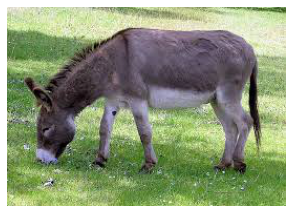

In [11]:
im = PILImage.create('donkey.jpg')
im.show()

In [12]:
learn.predict(im)[0]

(#0) []

Using a simple softmax and nll_loss would lead to the model being forced to choose a category of flower form the labels, but my using a binary cross entropy loss, when a image category which hasn't been trained is inputed it won't give an output!


In [13]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()